# **MARKET SEGMENTATION - McDonalds - Avantika Jalote**

## **LOADING DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
#Loading the dataset
df = pd.read_csv("mcdonalds.csv")

## **STEP 4: EXPLORING DATA**

In [3]:
print(df.dtypes)
print("\nShape: ",df.shape)

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

Shape:  (1453, 15)


In [4]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [6]:
# Extracting the eleven columns from df
df1 = df.iloc[:,0:11]
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [7]:
yummy = print(((df1['yummy'].value_counts(normalize=True)*100)[1]))

55.26496902959395


In [8]:
spicy = print(((df1['spicy'].value_counts(normalize=True)*100)[1]))

9.359944941500343


In [9]:
convenient = print(((df1['convenient'].value_counts(normalize=True)*100)[1]))

90.77770130763938


55% perceive McDonald’s as Yummy, 91% believe that McDonald's is Convenient, but only 9% think that McDonald’s food is Spicy.

In [10]:
# Principal Component Analysis

pca = PCA(n_components=11)
principal_components = pca.fit_transform(df1)
pca_df = pd.DataFrame(data=principal_components,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [11]:
pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11']].std()

PCA1     0.757050
PCA2     0.607456
PCA3     0.504619
PCA4     0.398799
PCA5     0.337405
PCA6     0.310275
PCA7     0.289697
PCA8     0.275122
PCA9     0.265251
PCA10    0.248842
PCA11    0.236903
dtype: float64

In [12]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df1.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


First two components capture about 50% of the information contained in the segmentation variables.

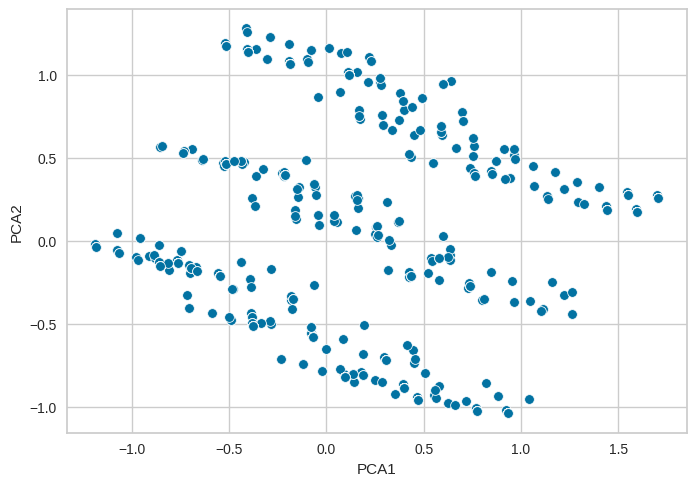

In [13]:
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2',palette='deep')
plt.show()

## STEP 5: EXTRACTING SEGMENTS

USING ELBOW METHOD

In [14]:
# Using elbow method
wcss = []
for i in range(1,11):
  # init is used for initializing the centroid
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 10)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

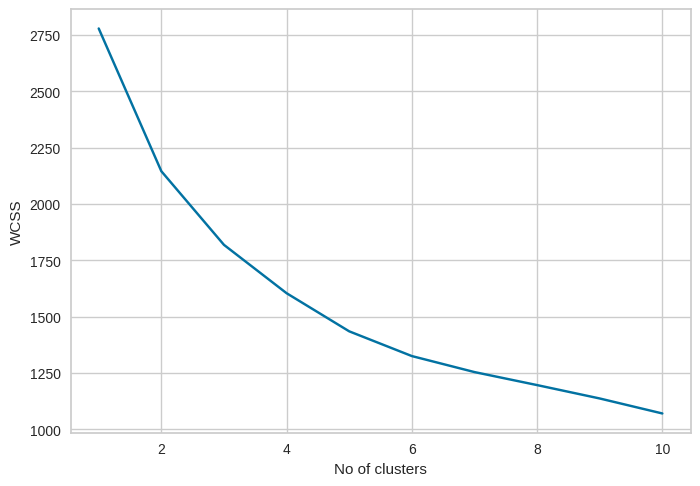

In [15]:
plt.plot(range(1,11),wcss)
plt.xlabel(range(1,11))
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

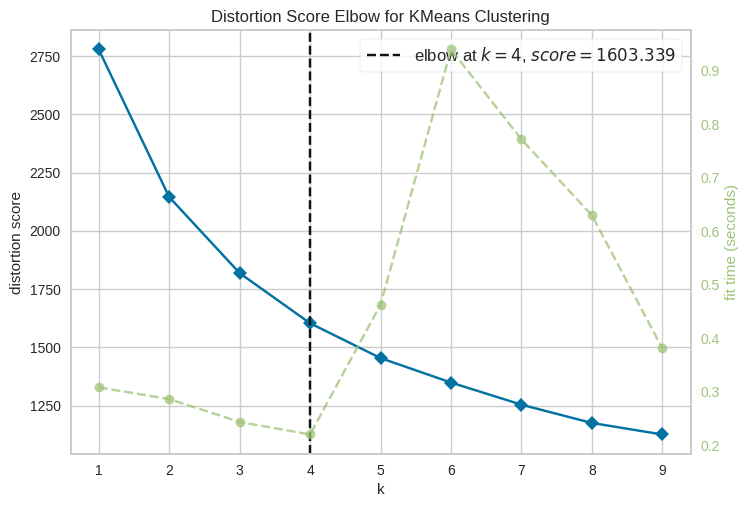

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
kmeans2 = KMeans()
visualizer = KElbowVisualizer(kmeans2, k=(1,10))
visualizer.fit(df1)
visualizer.show()

There is an elbow at k = 4 clusters

In [17]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df1)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)

In [18]:
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,3
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,0
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,0
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,1
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,3


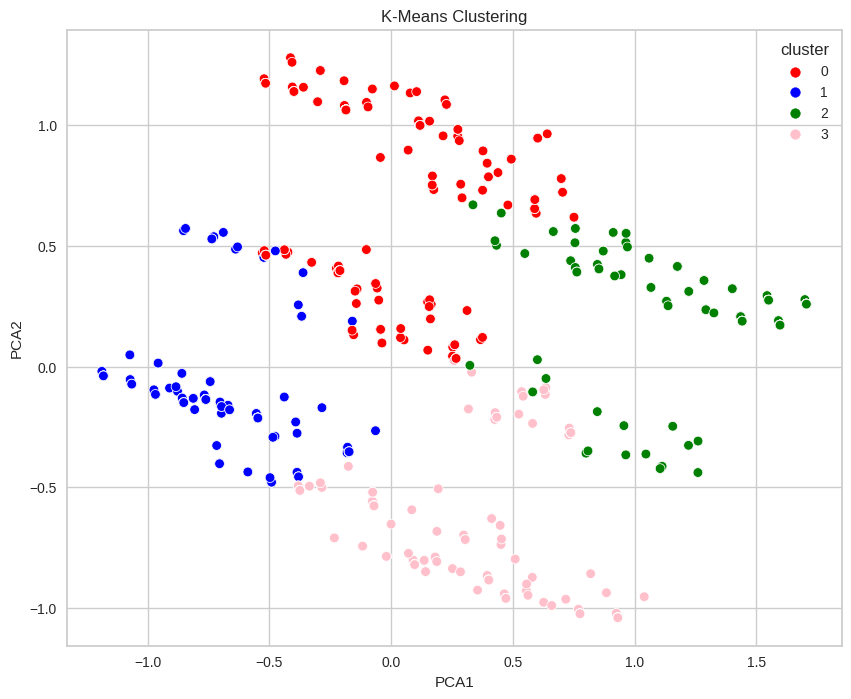

In [19]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','blue','green','pink','yellow'])
plt.title('K-Means Clustering')
plt.show()

In [20]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df1)
pca_df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)

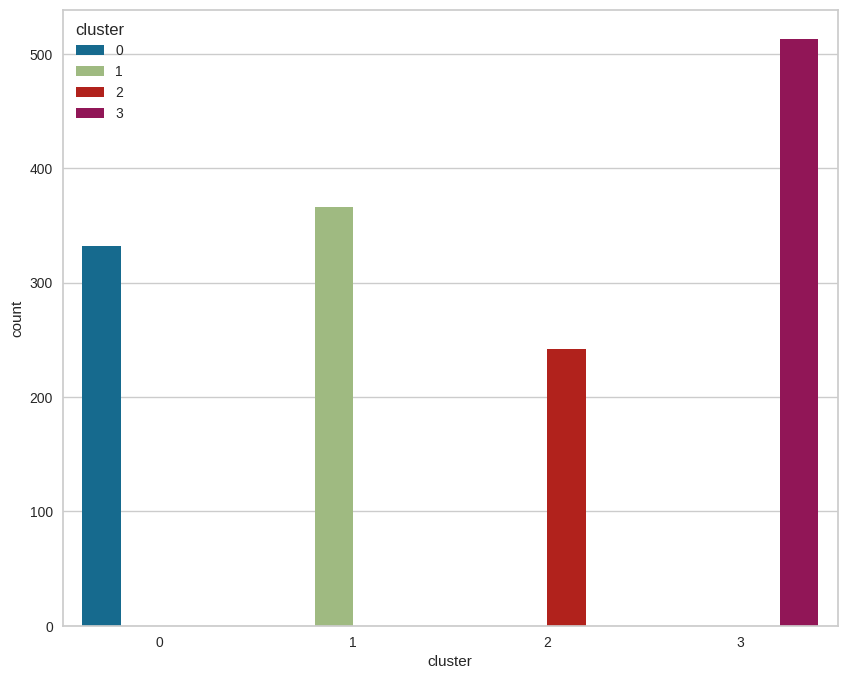

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x='cluster', data=pca_df_kmeans1, hue='cluster')
plt.show()

In [22]:
pca_df_kmeans1['cluster'].value_counts(normalize=True)*100

3    35.306263
1    25.189264
0    22.849277
2    16.655196
Name: cluster, dtype: float64

## **STEP 6: PROFILING SEGMENTS**

In [23]:
cluster1_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==0]
cluster1_analysis.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
6,1,1,1,1,0,1,0,1,1,1,0,0
9,1,1,0,1,1,1,0,1,1,0,0,0
11,1,1,0,1,1,1,0,1,1,0,1,0


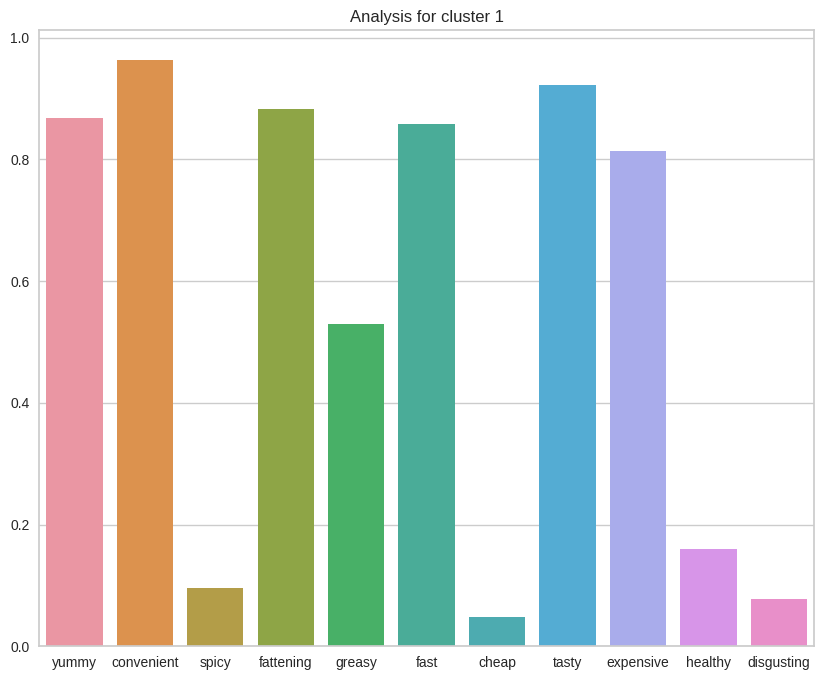

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 1')
plt.show()

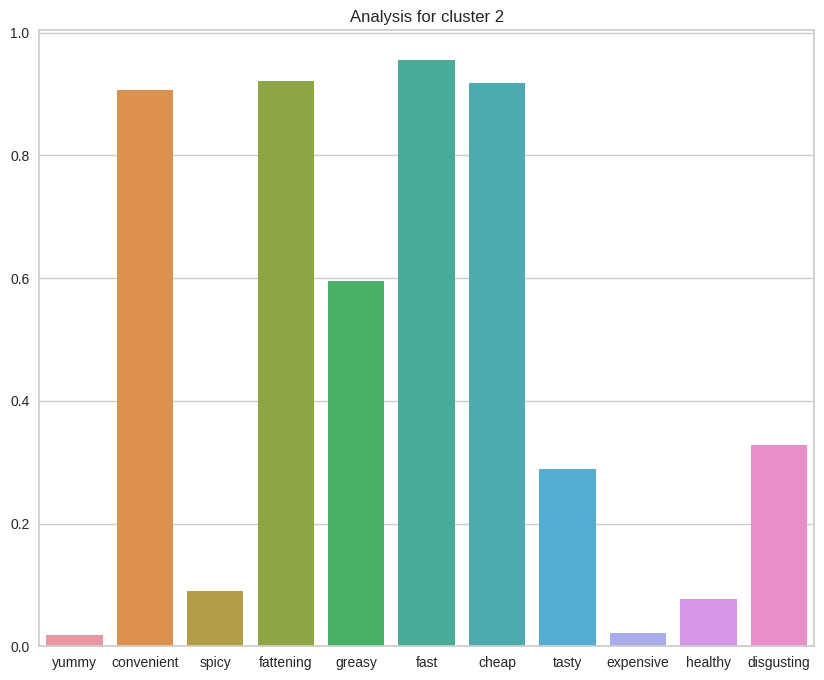

In [25]:
cluster2_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==1]
plt.figure(figsize=(10,8))
sns.barplot(data=cluster2_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 2')
plt.show()

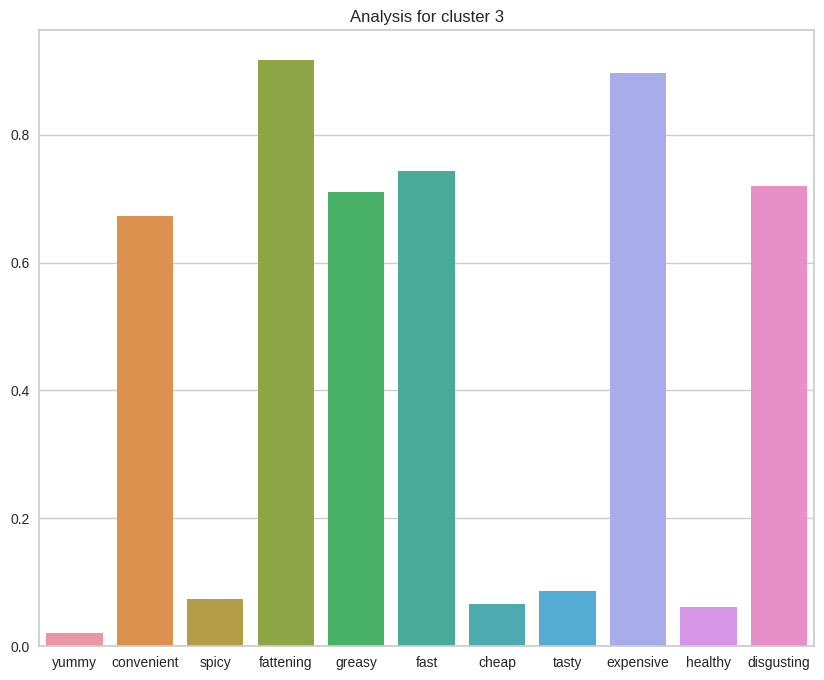

In [26]:
cluster3_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==2]
plt.figure(figsize=(10,8))
sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 3')
plt.show()

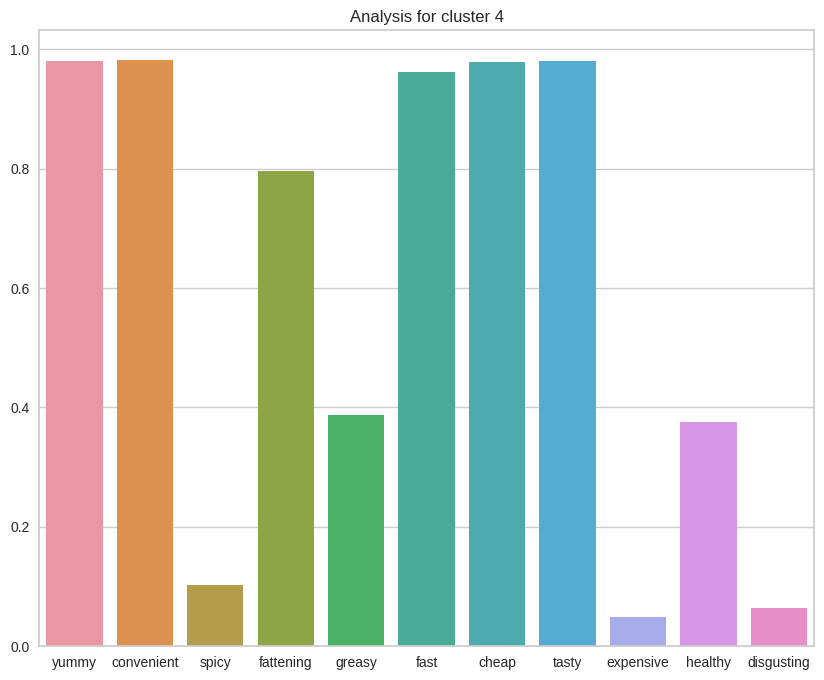

In [27]:
cluster4_analysis = pca_df_kmeans1[pca_df_kmeans1['cluster']==3]
plt.figure(figsize=(10,8))
sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 4')
plt.show()

## **STEP 7: DESCRIBING SEGMENTS**

In [28]:
df= pd.concat([df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,3
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,1


In [29]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [30]:
df['Like'] = df['Like'].replace({'I hate it!-5':0 ,'-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,6,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,Once a week,Female,3
4,0,1,0,1,1,1,1,0,0,1,0,7,49,Once a month,Male,1


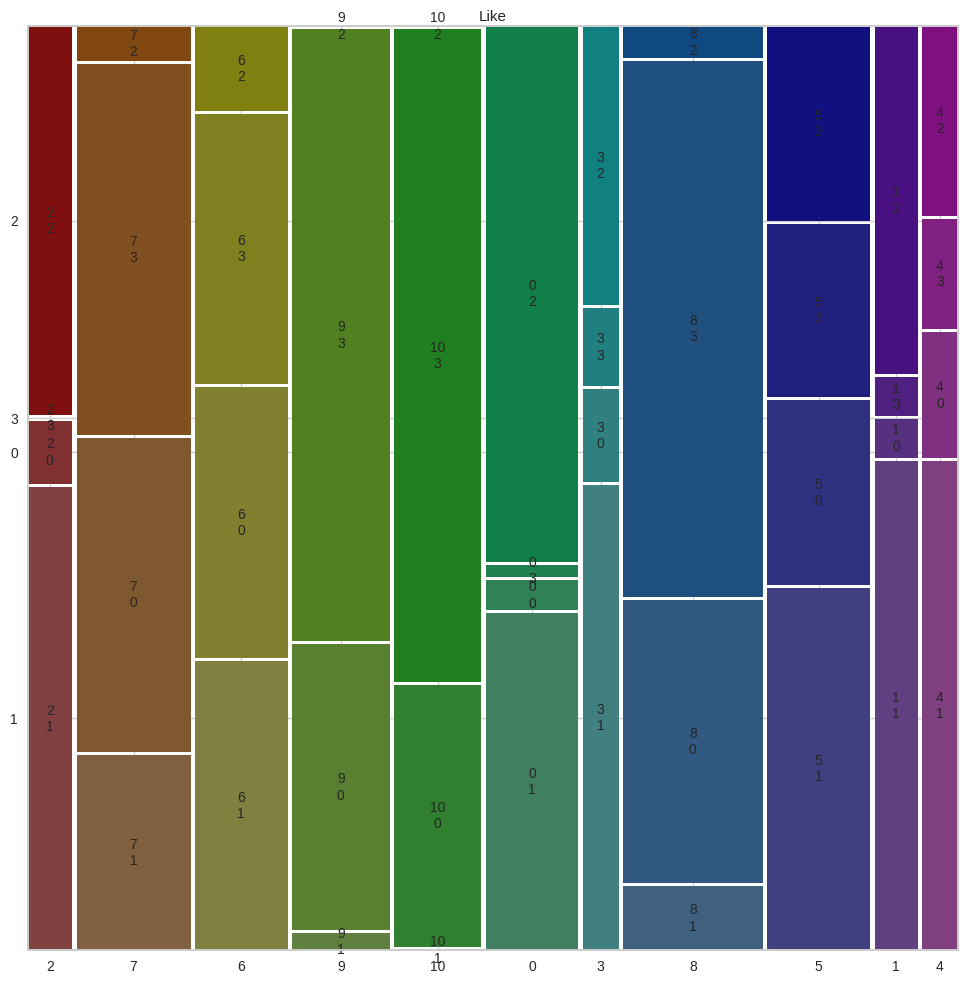

In [31]:
plt.rcParams['figure.figsize']=(12,12)
mosaic(df,['Like','cluster'])
plt.xlabel('Like')
plt.show()

In [32]:
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [33]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

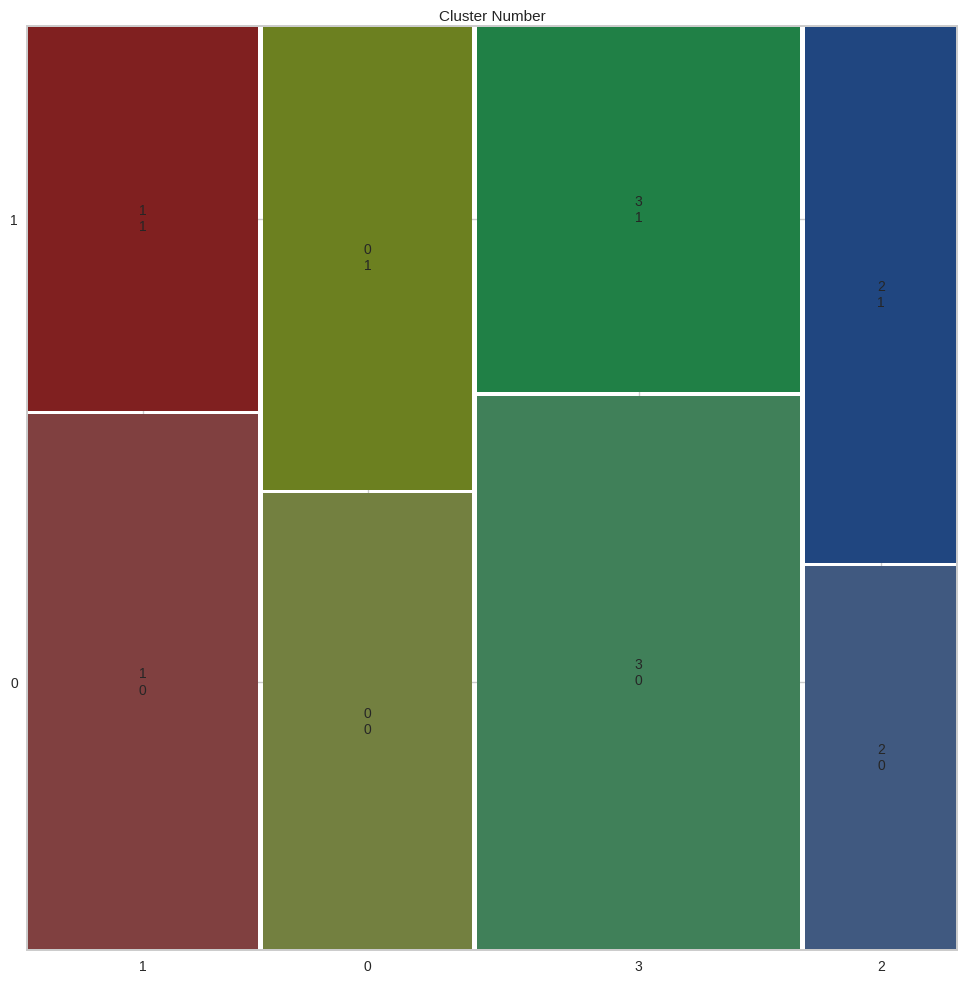

In [34]:
mosaic(df,['cluster','Gender'])
plt.xlabel('Cluster Number')
plt.show()

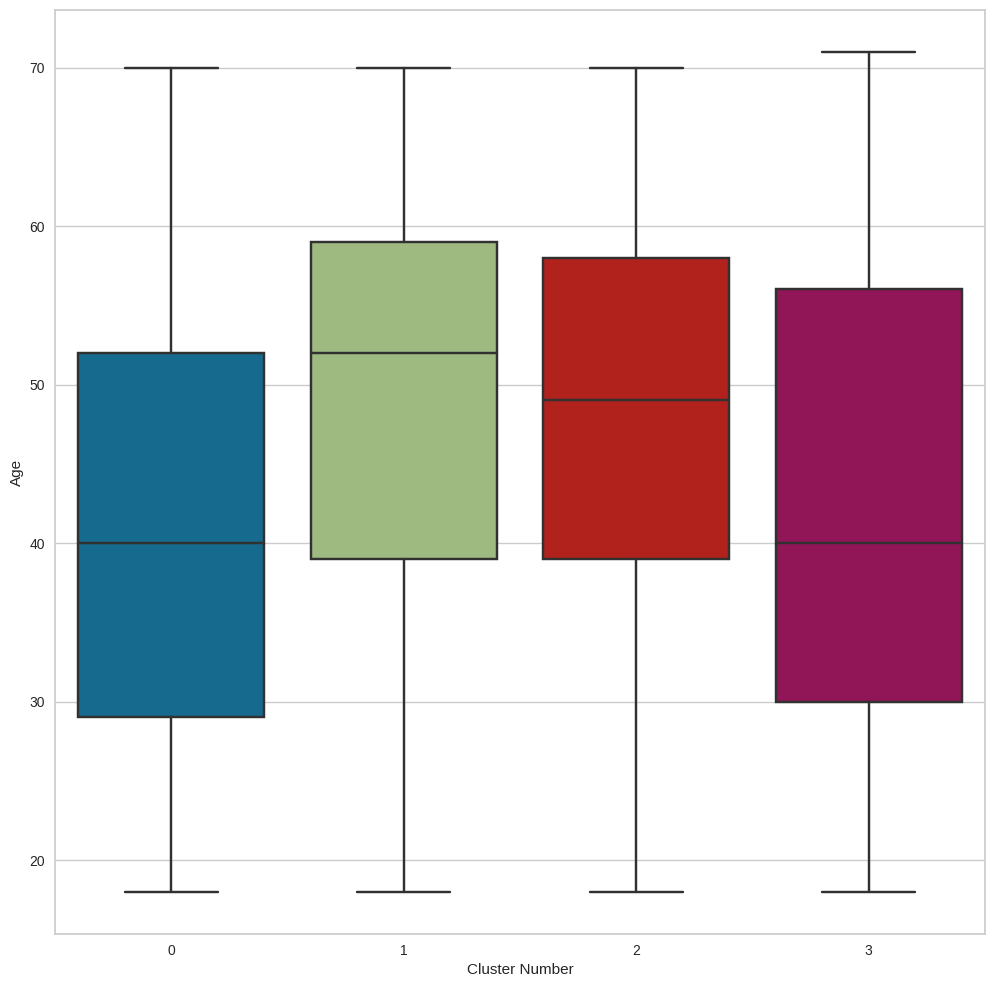

In [35]:
sns.boxplot(x=df['cluster'], y=df['Age'])
plt.xlabel('Cluster Number')
plt.show()

## **STEP 8: SELECTING TARGET SEGMENT**

In [36]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [37]:
df['VisitFrequency'] = df['VisitFrequency'].replace({'Never':0, 'Once a week':1, 'More than once a week':2, 'Once a month':3, 'Every three months':4, 'Once a year':5})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,4,0,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,4,0,0
2,0,1,1,1,1,1,0,1,1,1,0,6,62,4,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,1,0,3
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,1


In [38]:
X = df.iloc[:,0:15]
Y = df.iloc[:,15]

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)

(1017, 15)
(436, 15)


In [40]:
X_test.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1176,1,1,0,1,1,1,1,1,0,1,0,9,35,3,0
1332,1,1,0,1,1,1,0,1,1,0,0,9,40,1,0
941,1,0,0,1,1,1,0,1,1,0,0,9,21,3,0
878,1,1,0,1,1,1,1,1,1,1,0,9,34,1,0
35,0,1,0,1,1,1,1,0,0,0,1,3,54,4,0


In [41]:
dc = DecisionTreeClassifier(random_state=1234)
model = dc.fit(X, Y)

In [42]:
text_representation = tree.export_text(dc)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_12 <= 65.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_12 >  65.50
|   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_13 <= 3.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_13 >  3.50
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |-

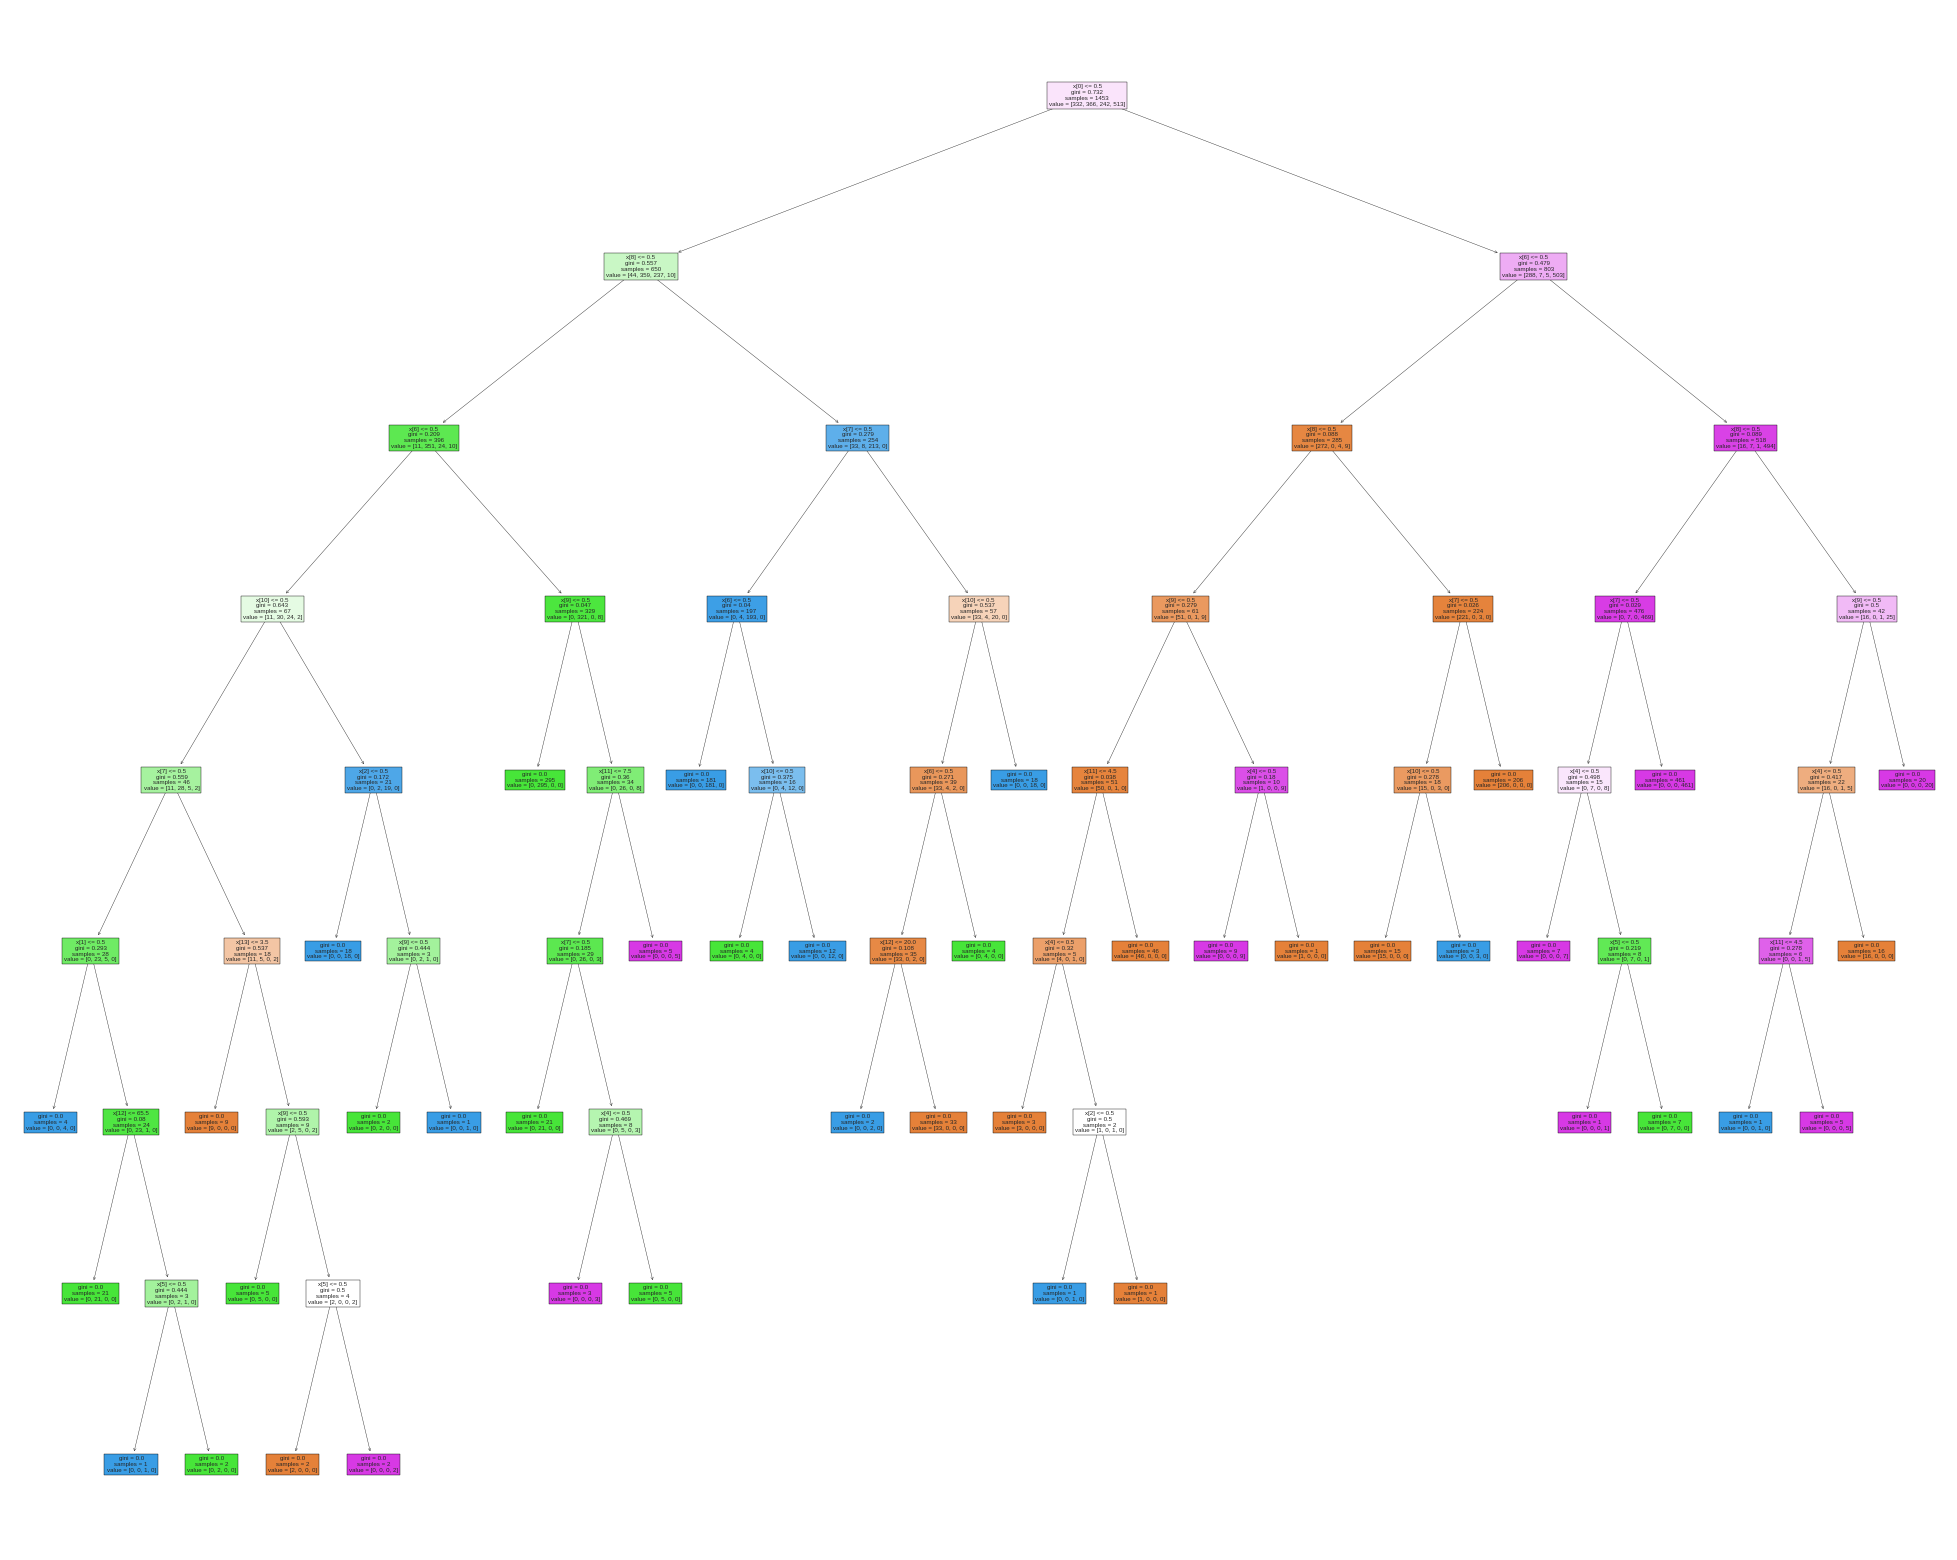

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dc, filled=True)